# Research Question: Are Entrepreneurs More Food Insecure? 

#### Group 4: Christopher Perez, Ernesto Perez, Kevin Santamaria

In [1]:
# Introduction: 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st
import math
import statsmodels.formula.api as smf


df = pd.read_csv('dec19pub.csv')
df2 = pd.read_csv('hhpub19.csv')

# Part I. Merging, Cleaning and Condensing the Data 

In [3]:
# Combining the files based on HouseHold Identifier

In [4]:
df2['H_IDNUM'] = df2['H_IDNUM'].astype(float)

In [5]:
df['HRHHID'] = df['HRHHID'].astype(str)

df['HRHHID2'] = df['HRHHID2'].astype(str)

df['H_IDNUM'] = pd.DataFrame((df['HRHHID'] + df['HRHHID2'])).astype(float)

In [6]:
merged = pd.merge(df, df2, on='H_IDNUM', how='inner')

In [7]:
merged = merged[["HESH2", 'HINC_FR', 'HINC_SE', "H_NUMPER", "HH5TO18", "H_TELHHD", "H_TENURE", "HHINC", "HSEVAL", "HDIS_YN", "HINC_WC", 'HUNITS', 'HED_YN', 'HCSP_YN', 'HWSVAL' ]]
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
1,1,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
2,1,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
3,1,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
4,1,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,-1,2,2,4,2,1,1,41,0,2,2,1,2,2,149000
21838,-1,2,2,4,1,1,1,41,0,2,2,1,2,2,163170
21839,-1,2,2,4,2,1,1,41,0,2,2,1,2,2,149000
21840,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
del df
del df2

In [9]:
merged['HESH2'].value_counts()

-1    19303
 2     1696
 1      814
-9       19
-3        7
-2        3
Name: HESH2, dtype: int64

In [10]:
merged['HESH2'] =  merged['HESH2'].map({1:1, 2:0})

In [11]:
merged['HESH2'].value_counts()

0.0    1696
1.0     814
Name: HESH2, dtype: int64

In [12]:
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
1,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
2,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
3,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
4,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,NaN,2,2,4,2,1,1,41,0,2,2,1,2,2,149000
21838,NaN,2,2,4,1,1,1,41,0,2,2,1,2,2,163170
21839,NaN,2,2,4,2,1,1,41,0,2,2,1,2,2,149000
21840,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
merged = merged.dropna()

In [14]:
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
1,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
2,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
3,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
4,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
20933,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
20934,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
21100,0.0,2,2,2,0,2,1,15,0,2,2,1,2,2,0


In [15]:
merged['H_NUMPER'].value_counts()

0     667
2     628
1     428
3     333
4     280
5      92
6      37
7      20
8      14
10     10
9       1
Name: H_NUMPER, dtype: int64

In [16]:
# these 667 people didn't respond to all except two of the questions that we are analyzing

In [17]:
merged = merged[merged['H_NUMPER'] != 0]
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
1,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
2,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
3,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
4,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
20933,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
20934,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
21100,0.0,2,2,2,0,2,1,15,0,2,2,1,2,2,0


In [18]:
merged['HINC_WC'].value_counts()

2    1829
1      14
Name: HINC_WC, dtype: int64

In [19]:
merged['HINC_FR'] = merged['HINC_FR'].map({1:1, 2:0})
merged['HINC_SE'] = merged['HINC_SE'].map({1:1, 2:0})
merged['H_TELHHD'] = merged['H_TELHHD'].map({1:1, 2:0})
merged['H_TENURE'] = merged['H_TENURE'].map({1:1, 2:0, 3:0})
merged['HDIS_YN'] = merged['HDIS_YN'].map({1:1, 2:0})
merged['HINC_WC'] = merged['HINC_WC'].map({1:1, 2:0})

<ipython-input-19-8c7d6759721e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['HINC_FR'] = merged['HINC_FR'].map({1:1, 2:0})
<ipython-input-19-8c7d6759721e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['HINC_SE'] = merged['HINC_SE'].map({1:1, 2:0})
<ipython-input-19-8c7d6759721e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [20]:
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1.0,0,0,2,0,1,1,39,0,0,0,1,2,2,75000
1,1.0,0,0,4,1,1,0,25,0,0,0,1,1,2,60000
2,1.0,0,0,2,0,1,1,39,0,0,0,1,2,2,75000
3,1.0,0,0,4,1,1,0,25,0,0,0,1,1,2,60000
4,1.0,0,0,2,0,1,1,39,0,0,0,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,1.0,0,0,2,0,1,1,41,0,0,0,1,2,2,91200
20933,1.0,0,0,2,0,1,1,41,0,0,0,1,2,2,91200
20934,1.0,0,0,2,0,1,1,41,0,0,0,1,2,2,91200
21100,0.0,0,0,2,0,0,1,15,0,0,0,1,2,2,0


# Part II. Descriptive Statistics for Entrepreneurs and Non-Entrepreneurs 

In [21]:
Non_Ent = merged[(merged.HINC_SE == 0)]
Ent = merged[(merged.HINC_SE == 1)]

In [22]:
ne_top_keys = Non_Ent['HHINC'].value_counts().index
ne_top_values = Non_Ent['HHINC'].value_counts().tolist()/Non_Ent['HHINC'].value_counts().sum()

e_top_keys = Ent['HHINC'].value_counts().index
e_top_values = Ent['HHINC'].value_counts().tolist()/Ent['HHINC'].value_counts().sum()

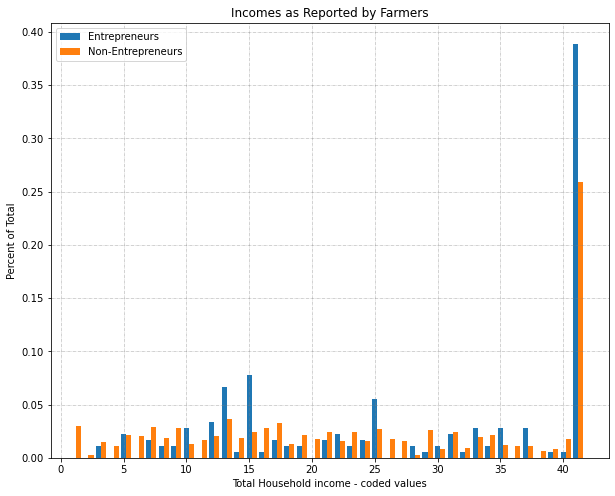

In [23]:
x1 = e_top_keys
x2 = ne_top_keys
y1 = e_top_values
y2 = ne_top_values

plt.figure(figsize=(10,8))
width = 0.40   
plt.bar(x1, y1, width, label='Entrepreneurs')
plt.bar(x2 + width, y2 , width, label='Non-Entrepreneurs')

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.7)

plt.ylabel('Percent of Total')
plt.xlabel('Total Household income - coded values')
plt.title('Incomes as Reported by Farmers')
plt.legend(loc='best')
plt.show()

In [24]:
# Almost half of self-employed farmers reported incomes over $100k (Value = 41 in DF), 
# The second and third most common incomes reported were $35,000 to $37,499 (15) and $30,000 to $32,499 (13). 

# Likewise, the most common response for Non-Entrepreneurs was also 41 (over $100k) .
# The second and third most common responses were 13 ($30,000 to $32,499) and 17 ($40,000 to $42,499). 

### b. Self-Employment Income

In [25]:
# No log 

In [26]:
# Log 

In [27]:
Non_E_log = np.log(Non_Ent['HWSVAL'])

/Users/sterlingstories/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
E_log = np.log(Ent['HSEVAL'])

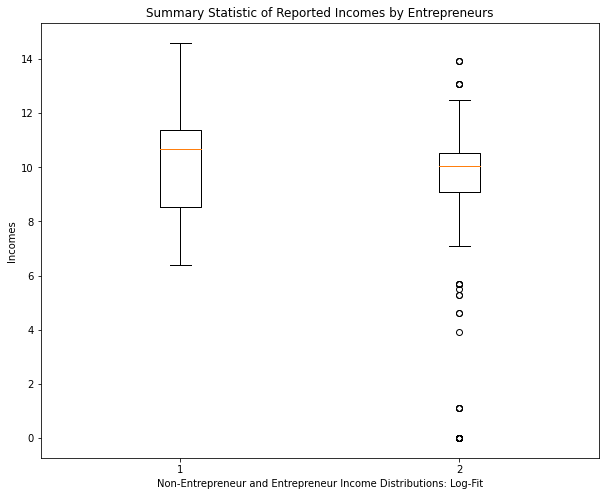

In [29]:
plt.figure(figsize=(10, 8))
plt.boxplot([Non_E_log , E_log])
plt.xlabel('Non-Entrepreneur and Entrepreneur Income Distributions: Log-Fit')
plt.ylabel('Incomes')
plt.title('Summary Statistic of Reported Incomes by Entrepreneurs')
plt.show()

In [30]:
# Cube 

In [31]:
Non_E_Cube = np.cbrt(Non_Ent['HWSVAL'])

In [32]:
E_Cube = np.cbrt(Ent['HSEVAL'])

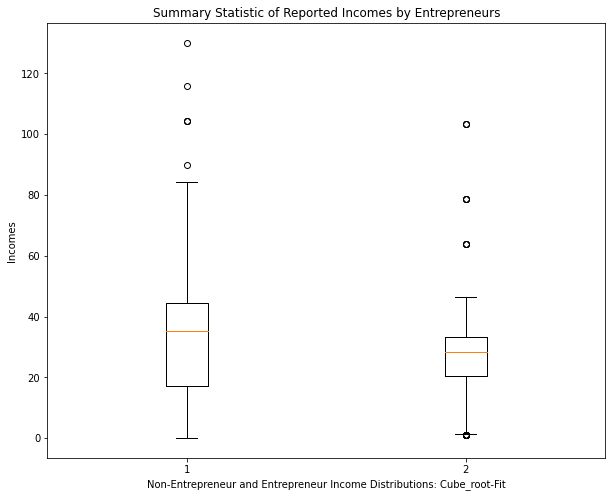

In [33]:
plt.figure(figsize=(10, 8))
plt.boxplot([Non_E_Cube, E_Cube])
plt.xlabel('Non-Entrepreneur and Entrepreneur Income Distributions: Cube_root-Fit')
plt.ylabel('Incomes')
plt.title('Summary Statistic of Reported Incomes by Entrepreneurs')
plt.show()

### Are these results statistically significant? 

In [34]:
def hypothesis_test(p):
    if p <= 0.05: return 'Reject the Null'
    else: return 'Fail to Reject the Null'

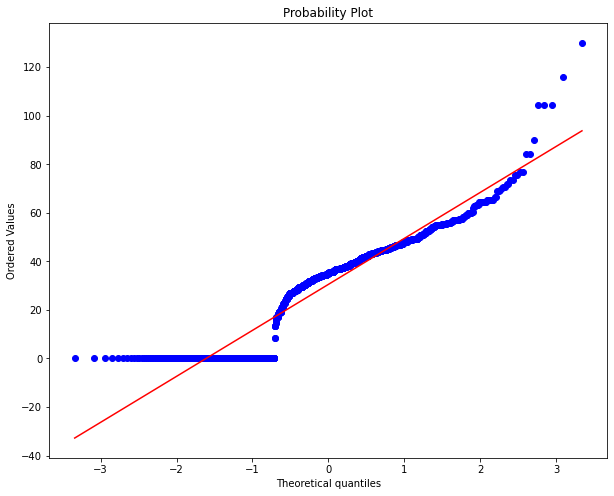

In [35]:
plt.figure(figsize=(10, 8))
st.probplot(Non_E_Cube,dist='norm', fit=True, plot=plt)
plt.show()

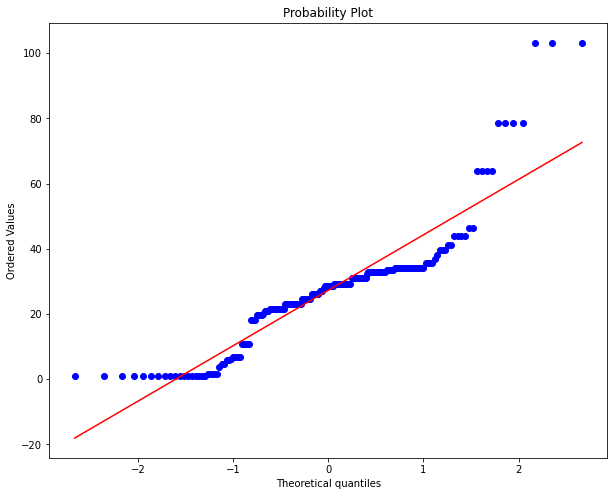

In [36]:
plt.figure(figsize=(10, 8))
st.probplot(E_Cube ,dist='norm', fit=True, plot=plt)
plt.show()

In [37]:
hypothesis_test(st.normaltest(Non_E_Cube)[1])

'Reject the Null'

In [38]:
hypothesis_test(st.normaltest(E_Cube)[1])

'Reject the Null'

### Central Limit Theorem

In [75]:
Ent['HSEVAL'] = np.cbrt(Ent['HSEVAL'])
Non_Ent['HWSVAL'] = np.cbrt(Non_Ent['HWSVAL'])

<ipython-input-75-257c823ce9f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ent['HSEVAL'] = np.cbrt(Ent['HSEVAL'])
<ipython-input-75-257c823ce9f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Non_Ent['HWSVAL'] = np.cbrt(Non_Ent['HWSVAL'])


In [76]:
import random
from statistics import mean

numSamples = 100
sizeSample = 30


entSamplesHSEVAL = list()
nonEntSamplesHWSVAL = list()


for i in range(numSamples):

    entSampleHSEVAL = list()
    nonEntSampleHWSVAL = list()


    for j in range(sizeSample):

        nEnt = random.randint(0, np.shape(Ent)[0] - 1)
        nNon_Ent = random.randint(0, np.shape(Non_Ent)[0] - 1)


        entHSEVAL = Ent['HSEVAL'].iat[nEnt]
        nonEntHWSVAL = Non_Ent['HWSVAL'].iat[nNon_Ent]


        entSampleHSEVAL.append(entHSEVAL)
        nonEntSampleHWSVAL.append(nonEntHWSVAL)


    entSamplesHSEVAL.append(mean(entSampleHSEVAL))
    nonEntSamplesHWSVAL.append(mean(nonEntSampleHWSVAL))





# entSamplesHSEVAL
# nonEntSamplesHWSVAL

In [77]:
hypothesis_test(st.normaltest(entSamplesHSEVAL)[1])

'Fail to Reject the Null'

In [78]:
hypothesis_test(st.normaltest(nonEntSamplesHWSVAL)[1])

'Fail to Reject the Null'

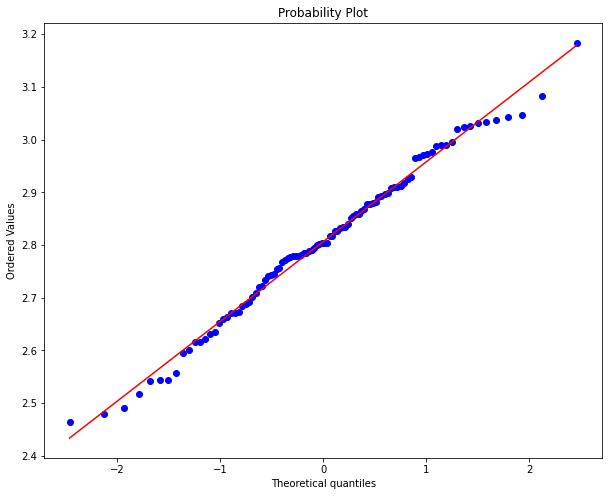

In [79]:
plt.figure(figsize=(10, 8))
st.probplot(entSamplesHSEVAL ,dist='norm', fit=True, plot=plt)
plt.show()

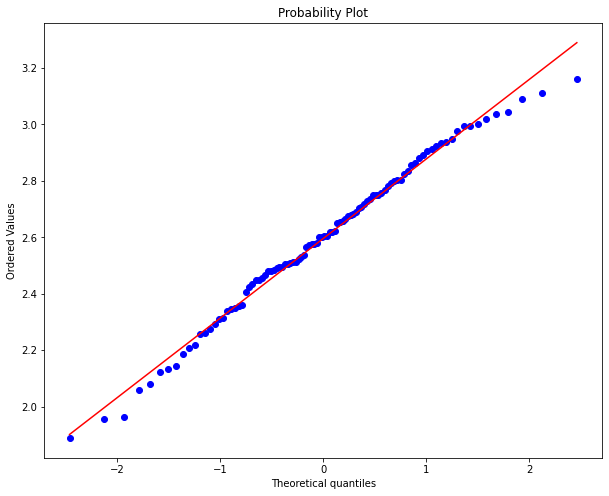

In [80]:
plt.figure(figsize=(10, 8))
st.probplot(nonEntSamplesHWSVAL ,dist='norm', fit=True, plot=plt)
plt.show()

### Testing for Variance 

In [81]:
hypothesis_test(st.levene(entSamplesHSEVAL, nonEntSamplesHWSVAL)[1])

'Reject the Null'

### T-Test

In [82]:
hypothesis_test(st.ttest_ind(entSamplesHSEVAL, nonEntSamplesHWSVAL)[1])

'Reject the Null'

In [83]:
# The differences in wages between entrepreneurs and non-entrepreneurs are indeed statistically significant. 

# Part III. Modeling 

In [47]:
# ModelH_NUMPER = smf.logit(formula='', data=merged).fit()

In [48]:
result1 = smf.ols('HESH2 ~ HINC_FR + HINC_SE + H_NUMPER + HH5TO18 + H_TELHHD + H_TENURE + HHINC + HSEVAL + HDIS_YN + HINC_WC', data=merged).fit()
print(result1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.024    
Dependent Variable: HESH2            AIC:                2385.2296
Date:               2021-04-20 02:03 BIC:                2445.9403
No. Observations:   1843             Log-Likelihood:     -1181.6  
Df Model:           10               F-statistic:        5.546    
Df Residuals:       1832             Prob (F-statistic): 3.51e-08 
R-squared:          0.029            Scale:              0.21233  
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       0.4529    0.0724   6.2518  0.0000   0.3108   0.5950
HINC_FR        -0.0682    0.0669  -1.0194  0.3081  -0.1994   0.0630
HINC_SE        -0.1961    0.0390  -5.0324  0.0000  -0.2725  -0.1197
H_NUMPER        0.0044    0.0114   0.3845  0.7007  -0.0180   0.0268
HH5TO1

In [49]:
result1 = smf.ols('HESH2 ~ HINC_FR + HINC_SE + H_NUMPER + HH5TO18 + H_TELHHD + H_TENURE + HHINC + HDIS_YN + HINC_WC', data=merged).fit()
print(result1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.021    
Dependent Variable: HESH2            AIC:                2390.6771
Date:               2021-04-20 02:03 BIC:                2445.8686
No. Observations:   1843             Log-Likelihood:     -1185.3  
Df Model:           9                F-statistic:        5.319    
Df Residuals:       1833             Prob (F-statistic): 3.38e-07 
R-squared:          0.025            Scale:              0.21307  
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       0.4472    0.0725   6.1652  0.0000   0.3050   0.5895
HINC_FR        -0.0397    0.0662  -0.6000  0.5486  -0.1696   0.0901
HINC_SE        -0.1651    0.0373  -4.4225  0.0000  -0.2384  -0.0919
H_NUMPER        0.0044    0.0115   0.3803  0.7038  -0.0181   0.0268
HH5TO1

In [50]:
result2 = smf.logit('HESH2 ~ HINC_FR + HINC_SE + H_NUMPER + HH5TO18 + H_TELHHD + H_TENURE + HHINC + HDIS_YN + HINC_WC', data=merged).fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.613239
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.021     
Dependent Variable: HESH2            AIC:              2280.3991 
Date:               2021-04-20 02:03 BIC:              2335.5906 
No. Observations:   1843             Log-Likelihood:   -1130.2   
Df Model:           9                LL-Null:          -1154.7   
Df Residuals:       1833             LLR p-value:      1.5934e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1861    0.3282  -0.5671  0.5707  -0.8294   0.4572
HINC_FR       -0.2393    0.3530  -0.6781  0.4977  -0.9311   0.